<a href="https://colab.research.google.com/github/shineloveyc/DL_with_Keras/blob/master/Keras_New_Classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*This is a multiclass classification problem

In [0]:
# load the data
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [40]:
print(len(train_data))
print(len(test_data))

8982
2246


In [41]:
#each sample is a list of embeding integer
print(' '.join(map(str, train_data[0])))  

1 2 2 8 43 10 447 5 25 207 270 5 3095 111 16 369 186 90 67 7 89 5 19 102 6 19 124 15 90 67 84 22 482 26 7 48 4 49 8 864 39 209 154 6 151 6 83 11 15 22 155 11 15 7 48 9 4579 1005 504 6 258 6 272 11 15 22 134 44 11 15 16 8 197 1245 90 67 52 29 209 30 32 132 6 109 15 17 12


In [0]:
#vectorization the list to tensor
#prepare the data==> turning the list of words to tensor
# Encoding the integer sequence into a binary matrix(one- hot encoding)
import numpy as np
def vector_seq (seq, dim = 10000):
  results = np.zeros((len(seq), dim))
  for i, seq in enumerate(seq):
      results[i, seq] = 1.
  return results

In [0]:
#change the data
x_train = vector_seq(train_data)
x_test = vector_seq(test_data)

In [0]:
#change muticlass labels to categorical factors
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
#build the model with 64 layers
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46,activation='softmax'))


In [0]:
#compile the model
from keras import optimizers
from keras import losses

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [47]:
#train the model
history = model.fit(x = x_train, y = one_hot_train_labels, epochs = 20, validation_split=0.3, shuffle=True, batch_size=512)

Train on 6287 samples, validate on 2695 samples
Epoch 1/20
6287/6287 [==============================] - 1s 178us/step - loss: 2.6875 - acc: 0.4994 - val_loss: 1.8116 - val_acc: 0.6137
Epoch 2/20
6287/6287 [==============================] - 1s 145us/step - loss: 1.4931 - acc: 0.6812 - val_loss: 1.3804 - val_acc: 0.7098
Epoch 3/20
6287/6287 [==============================] - 1s 143us/step - loss: 1.1111 - acc: 0.7670 - val_loss: 1.2025 - val_acc: 0.7421
Epoch 4/20
6287/6287 [==============================] - 1s 144us/step - loss: 0.8852 - acc: 0.8215 - val_loss: 1.0947 - val_acc: 0.7647
Epoch 5/20
6287/6287 [==============================] - 1s 143us/step - loss: 0.7126 - acc: 0.8554 - val_loss: 1.0283 - val_acc: 0.7781
Epoch 6/20
6287/6287 [==============================] - 1s 149us/step - loss: 0.5780 - acc: 0.8807 - val_loss: 1.0140 - val_acc: 0.7770
Epoch 7/20
6287/6287 [==============================] - 1s 143us/step - loss: 0.4660 - acc: 0.9057 - val_loss: 0.9572 - val_acc: 0.7959


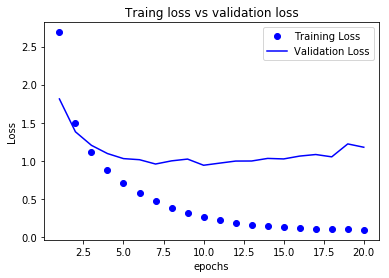

In [51]:
#plot the train and validation loss
import matplotlib.pyplot as pt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss)+1)

pt.plot(epochs,train_loss,'bo', label = 'Training Loss')
pt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
pt.title("Traing loss vs validation loss")
pt.xlabel("epochs")
pt.ylabel('Loss')
pt.legend()
pt.show()

It can be seen from the graph, the performance of validation set starting drop at epoch 10, which means the model starts overfitting

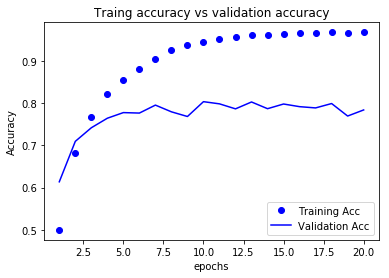

In [52]:
#plot the accuracy
train_acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(train_acc)+1)

pt.plot(epochs,train_acc,'bo', label = 'Training Acc')
pt.plot(epochs, val_acc, 'b', label = 'Validation Acc')
pt.title("Traing accuracy vs validation accuracy")
pt.xlabel("epochs")
pt.ylabel('Accuracy')
pt.legend()
pt.show()

In [53]:
#build the new model
model.fit(x = x_train, y = one_hot_train_labels, epochs = 10, batch_size=512)

Epoch 1/10
8982/8982 [==============================] - 2s 227us/step - loss: 0.3824 - acc: 0.9189
Epoch 2/10
8982/8982 [==============================] - 1s 119us/step - loss: 0.2742 - acc: 0.9335
Epoch 3/10
8982/8982 [==============================] - 1s 118us/step - loss: 0.2243 - acc: 0.9429
Epoch 4/10
8982/8982 [==============================] - 1s 119us/step - loss: 0.1883 - acc: 0.9496
Epoch 5/10
8982/8982 [==============================] - 1s 119us/step - loss: 0.1715 - acc: 0.9513
Epoch 6/10
8982/8982 [==============================] - 1s 121us/step - loss: 0.1540 - acc: 0.9511
Epoch 7/10
8982/8982 [==============================] - 1s 126us/step - loss: 0.1430 - acc: 0.9536
Epoch 8/10
8982/8982 [==============================] - 1s 154us/step - loss: 0.1333 - acc: 0.9529
Epoch 9/10
8982/8982 [==============================] - 1s 137us/step - loss: 0.1280 - acc: 0.9568
Epoch 10/10
8982/8982 [==============================] - 1s 151us/step - loss: 0.1243 - acc: 0.9549


In [0]:
#predict the new set
pred = model.predict(x_test)

In [55]:
pred[0].shape

(46,)

In [57]:
#the shape of the prediction is 46, which means the possibility of each topic
np.sum(pred[0], axis = 0)

1.0000002

In [58]:
#the topic with the largest possibility in the first output
np.argmax(pred[0])

3

In [59]:
model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 148us/step


[1.1680587310400374, 0.7925200356719543]